! wget https://scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/ -O sweden.xls

https://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/yearly-statistics--the-whole-country/summary-of-population-statistics/

In [1]:
import pandas as pd

In [2]:
!pip install xlrd

In [3]:
full_df = pd.read_excel('sweden.xls','Tabell 1')


In [4]:
from datetime import datetime

df = full_df.iloc[6:]
columns = list(full_df.columns)
df = df[columns[:7]]
df = df.iloc[:-1]
df.columns = ['date','y2015','y2016','y2017','y2018','y2019','y2020']
swedish_months = ['januari','februari','mars','april','maj','juni','juli','augusti','september','oktober','november','december']
df['datestamp'] = df.date.str.split(' ').apply(lambda z: "{1:02d}-{0:02d}".format(int(z[0]), swedish_months.index(z[1])+1))
df = df.set_index('datestamp')
df = df.drop('date', axis=1)

In [5]:
from yo_ds import Query
pop = pd.read_csv('sweden_population.csv')
pop = pop.transpose().iloc[1:].reset_index()
pop.columns=['year','population']
pop.year = pop.year.astype(int)+1
pop.population = pop.population.apply(lambda z: int(z.replace(' ','')))
pop = Query.df(pop).to_dictionary(lambda z: str(z.year), lambda z: z.population)

In [6]:
years = [str(c) for c in range(2015,2021)]
years

['2015', '2016', '2017', '2018', '2019', '2020']

In [7]:
df = df.loc[df.index!='02-29']

In [9]:
border_date='09-25'

In [19]:
import numpy as np

cumulative_corrected = []
cumulative = []
relative = []
for y in years:
    rl_name = 'rel_'+y
    
    
    relative.append(rl_name)
    
    cm_name = 'cm_'+y
    cumulative.append(cm_name)
    df[cm_name] = df[rl_name].cumsum()
    
df['cm_mean'] = df[cumulative[:-1]].mean(axis=1)
df['rel_mean'] = df[relative[:-1]].mean(axis=1)



for y in years:
    cc_name = 'cc_'+y
    df[cc_name] = df['cm_'+y]-df.cm_mean
    cumulative_corrected.append(cc_name)
    
df['rel_2020'] = np.where(df.index>border_date, None, df.rel_2020)
df['cm_2020'] = np.where(df.index>border_date, None, df.cm_2020)
df['cc_2020'] = np.where(df.index>border_date, None, df.cc_2020)

/home/yura/anaconda3/envs/bsys/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


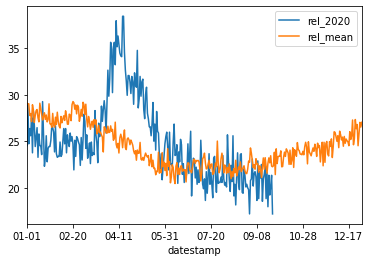

In [20]:
ax = df[['rel_2020','rel_mean']].plot()

/home/yura/anaconda3/envs/bsys/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(0.0, 40.0)

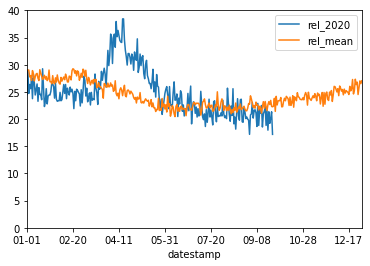

In [21]:
ax = df[['rel_2020','rel_mean']].plot()
ax.set_ylim((0,40))

<AxesSubplot:>

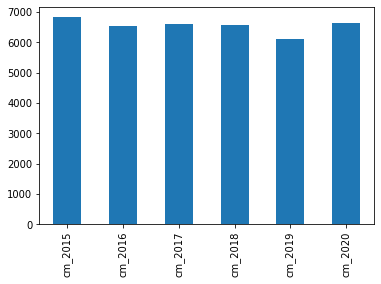

In [22]:
df.loc[border_date][cumulative].plot(kind='bar')

/home/yura/anaconda3/envs/bsys/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='datestamp'>

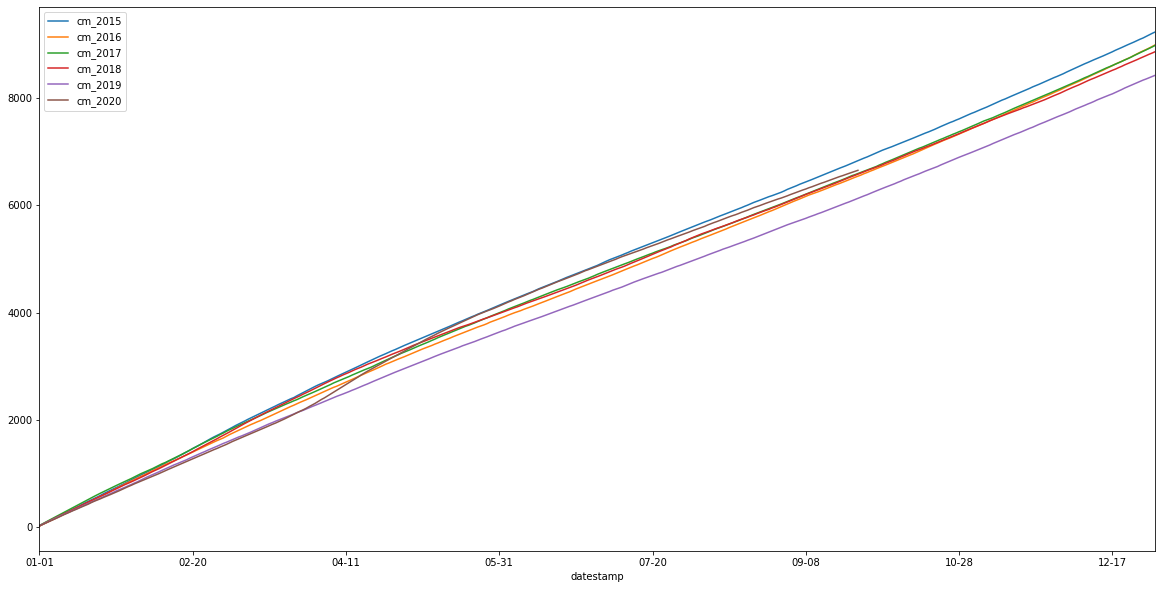

In [23]:
from matplotlib import pyplot as plt
_, ax = plt.subplots(1,1,figsize=(20,10))
df[cumulative].plot(ax=ax)

/home/yura/anaconda3/envs/bsys/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='datestamp'>

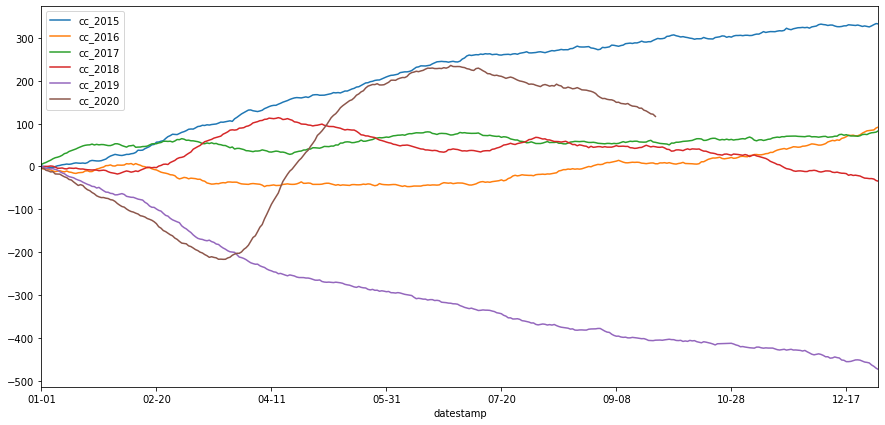

In [24]:
_, ax = plt.subplots(1,1,figsize=(15,7))
df[cumulative_corrected].plot(ax=ax)